# Fuse multiple chunks and run the Poisson reconstruction

This notebook aims at fusing a few chunks of data together and creating a mesh using screened Poisson reconstruction.

We start by importing a few libraries, then plotting the cropping boxes. 

In [9]:
import numpy as np 
import matplotlib.pyplot as plt


import cloudComPy as cc # cloud compare python interface.
if cc.isPluginCanupo():
    import cloudComPy.Canupo

if cc.isPluginPCL():
    import cloudComPy.PCL
from osgeo import gdal, ogr, osr
from subprocess import run

import json

import os
from yaml import load
from yaml.loader import Loader

from helpers.utils import plot_segmentation_scheme

In [10]:
caveName = "02_GrotteDeLaCascadeDeMotiers"
root = f"../../real_data/{caveName}"


PROCESSING_FILEPATH = os.path.join(root, "params.yaml")
p = load(open(PROCESSING_FILEPATH), Loader)
shift = p["alignment"]["globalShift"]

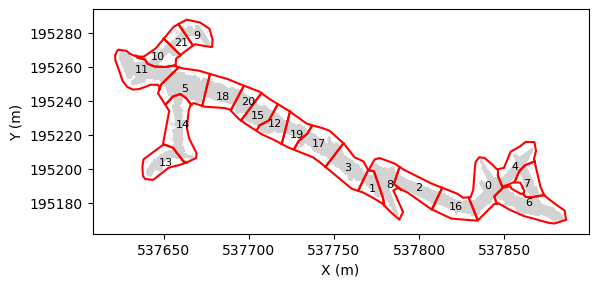

In [11]:
fig, ax = plt.subplots()

ax, res = plot_segmentation_scheme(root, ax)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")

plt.show()

In [46]:
# now select the segments we want to fuse together. 

toBeFused = [13,14]

suffix = [str(i) for i in toBeFused]

'13_14'

In [39]:
fp = os.path.join(root, "process", "Cropped_{i}_normals_reoriented.ply")

In [40]:
paths = [fp.format(i=i) for i in toBeFused]

In [41]:
paths

['../../real_data/02_GrotteDeLaCascadeDeMotiers\\process\\Cropped_13_normals_reoriented.ply',
 '../../real_data/02_GrotteDeLaCascadeDeMotiers\\process\\Cropped_14_normals_reoriented.ply']

In [42]:
clouds = [cc.loadPointCloud(fp,  cc.CC_SHIFT_MODE.XYZ, 0, *shift) for fp in paths]

In [43]:
merged = cc.MergeEntities(clouds, deleteOriginalClouds= True, createSFcloudIndex= False)

In [47]:
ret = cc.SavePointCloud(merged, os.path.join(root, "output/merged_{sufx}.ply".format(sufx = "_".join(suffix))))